<a href="https://colab.research.google.com/github/soil15/US_accidents/blob/main/EDA_us_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (US_accidents)

## Importing dataset


In [14]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
!pip install kaggle

In [16]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [17]:
!touch .kaggle

In [18]:
!ls

drive  kaggle.json  sample_data


In [19]:
import json
token = {"username":"soil89","key":"d2a64218a716fafc304dfe8249b6dbaa"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [20]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [21]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [22]:
!chmod 600 /root/.kaggle/kaggle.json

In [23]:
!kaggle datasets download -d sobhanmoosavi/us-accidents --force

100% 290M/290M [00:01<00:00, 192MB/s]
100% 290M/290M [00:01<00:00, 181MB/s]


In [24]:
!unzip \*.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20_Updated.csv  


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [26]:
data_frame = pd.read_csv("/content/US_Accidents_Dec20_Updated.csv")
data_frame.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [27]:
data_frame["Severity"].value_counts()

2    2129263
3     629452
4     119144
1      28751
Name: Severity, dtype: int64

In [28]:
data_frame["Weather_Condition"].value_counts()

Fair                       692680
Clear                      498925
Mostly Cloudy              386122
Partly Cloudy              268851
Cloudy                     245054
                            ...  
Blowing Sand                    1
Widespread Dust / Windy         1
Heavy Rain Showers              1
Thunder and Hail                1
Heavy Smoke                     1
Name: Weather_Condition, Length: 128, dtype: int64

In [29]:
data_frame["Bump"].value_counts()

False    2906031
True         579
Name: Bump, dtype: int64

In [30]:
data_frame.shape

(2906610, 47)

In [31]:
numeric_cols = [col for col in data_frame.columns if data_frame[col].dtype != "O"]
numeric_cols, len(numeric_cols)

(['Severity',
  'Start_Lat',
  'Start_Lng',
  'End_Lat',
  'End_Lng',
  'Distance(mi)',
  'Number',
  'Temperature(F)',
  'Wind_Chill(F)',
  'Humidity(%)',
  'Pressure(in)',
  'Visibility(mi)',
  'Wind_Speed(mph)',
  'Precipitation(in)',
  'Amenity',
  'Bump',
  'Crossing',
  'Give_Way',
  'Junction',
  'No_Exit',
  'Railway',
  'Roundabout',
  'Station',
  'Stop',
  'Traffic_Calming',
  'Traffic_Signal',
  'Turning_Loop'],
 27)

## Null / Missing values


In [32]:
null_val = data_frame.isnull().sum()
null_val

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [33]:
print("null values in percentage:\n")
percentage = null_val[null_val > 0] * 100 / len(data_frame) 
percentage

null values in percentage:



End_Lat                   9.730270
End_Lng                   9.730270
Number                   65.081728
City                      0.003716
Zipcode                   0.038326
Timezone                  0.118007
Airport_Code              0.227344
Weather_Timestamp         1.614148
Temperature(F)            2.312797
Wind_Chill(F)            40.729888
Humidity(%)               2.451997
Pressure(in)              1.957882
Visibility(mi)            2.479796
Wind_Direction            2.183781
Wind_Speed(mph)          10.567740
Precipitation(in)        44.771263
Weather_Condition         2.471986
Sunrise_Sunset            0.003784
Civil_Twilight            0.003784
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
dtype: float64

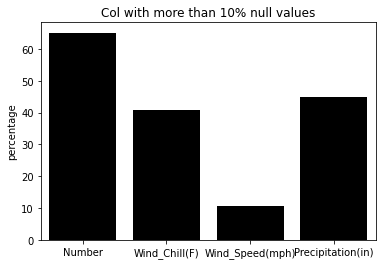

Number               65.081728
Wind_Chill(F)        40.729888
Wind_Speed(mph)      10.567740
Precipitation(in)    44.771263
dtype: float64

In [34]:
sb.barplot(x=percentage[percentage > 10.0].index, y=percentage[percentage > 10.0], color="black")
plt.ylabel("percentage")
plt.title("Col with more than 10% null values")
plt.show()
percentage[percentage > 10.0]

In [35]:
data_frame["Severity"].value_counts()

data_frame["Severity"].head()

0    2
1    2
2    2
3    2
4    3
Name: Severity, dtype: int64

['Number', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Severity'] 



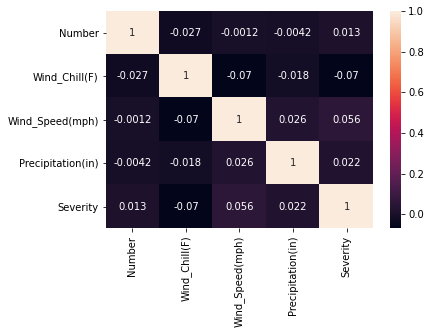

In [36]:
Nan_cols = list(percentage[percentage > 10.0].index)

Nan_cols.extend(["Severity"])
print(Nan_cols, "\n")

corr = data_frame[Nan_cols].corr()

sb.heatmap(corr, annot=True)
plt.show()

**As we can see all the columns which have more than 10% null values are barely 
correlated to severity so we can either remove them or just dont consider in the analysis and fill those Nan values in feature engineering part.**



## Exploratory analysis and visualization

In [50]:
data_frame.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [38]:
data_frame.corr()["Severity"]

Severity             1.000000
Start_Lat            0.061409
Start_Lng            0.106505
End_Lat              0.065170
End_Lng              0.116482
Distance(mi)         0.127185
Number               0.013217
Temperature(F)      -0.004717
Wind_Chill(F)       -0.070314
Humidity(%)          0.027513
Pressure(in)         0.051001
Visibility(mi)      -0.002381
Wind_Speed(mph)      0.056054
Precipitation(in)    0.021830
Amenity             -0.028065
Bump                -0.002865
Crossing            -0.107441
Give_Way            -0.002779
Junction             0.038648
No_Exit             -0.005160
Railway             -0.014644
Roundabout          -0.002841
Station             -0.035492
Stop                -0.036645
Traffic_Calming     -0.001062
Traffic_Signal      -0.132553
Turning_Loop              NaN
Name: Severity, dtype: float64

In [39]:
high_corr_cols = []

for val, index in zip(data_frame.corr()["Severity"], data_frame.corr()["Severity"].index):
  if(val > 0.1 or val < -0.1) and (index != "Severity"):
    high_corr_cols.append(index)

high_corr_cols, len(high_corr_cols)

(['Start_Lng', 'End_Lng', 'Distance(mi)', 'Crossing', 'Traffic_Signal'], 5)

### longitudes and latitudes

In [40]:
data_frame["Start_Lng"]

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [41]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import random

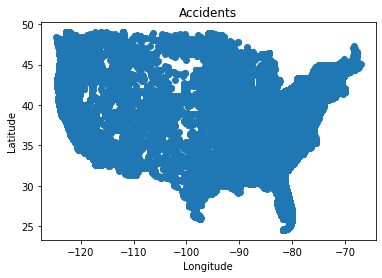

In [42]:
plt.scatter(x=data_frame["Start_Lng"], y=data_frame["Start_Lat"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accidents")
plt.show()

**We cannot draw a conclusion since there are 2.9 million records of accidents. lets try using heatmap.**

In [130]:
lat_lon_pairs = [[lat, lon] for lat, lon in zip(data_frame["Start_Lat"], data_frame["Start_Lng"])]

map = folium.Map(location=[41.50000, -100.0], zoom_start=4.75, zoom_control=False, width=1500, height=800, no_touch=True)

folium.TileLayer('Mapbox Bright').add_to(map)

rand_pairs = [lat_lon_pairs[random.randint(0, len(lat_lon_pairs))] for _ in range(10000)]

HeatMap(rand_pairs).add_to(map)

map

**So, heatmap shows that most accident occur in coastal areas. This might be because of the higher frequency of Highways in coastal areas.**

##Time

In [101]:
year = pd.DatetimeIndex(data_frame["Start_Time"]).year

year_count = year.value_counts()
year_count, list(year_count)

(2020    1033828
 2019     617712
 2018     535921
 2017     448268
 2016     270881
 Name: Start_Time, dtype: int64, [1033828, 617712, 535921, 448268, 270881])

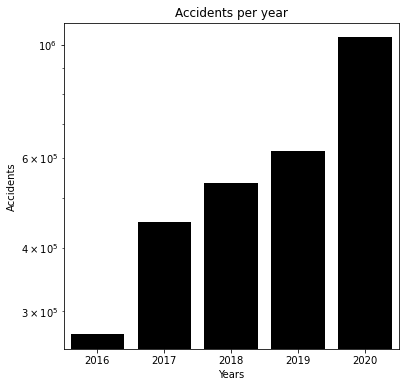

In [80]:
plt.figure(figsize=(6, 6))
bar = sb.barplot(x=list(year_count.index), y=list(year_count), color="Black")
plt.title("Accidents per year")
plt.xlabel("Years")
plt.ylabel("Accidents")
bar.set_yscale("log")
plt.show()

**we can see exponential distribution between year and accidents**

In [100]:
month = pd.DatetimeIndex(data_frame["Start_Time"]).month
month_counts = month.value_counts()
month_counts

12    403095
11    360169
10    326430
9     255159
6     214558
4     205487
5     204889
1     198485
3     197969
8     196597
2     186660
7     157112
Name: Start_Time, dtype: int64

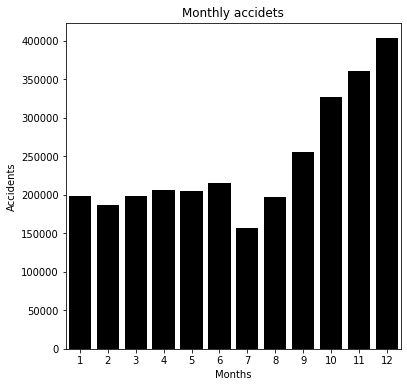

In [129]:
plt.figure(figsize=(6, 6))
sb.barplot(x=list(month_counts.index), y=list(month_counts), color="Black")
plt.xlabel("Months")
plt.ylabel("Accidents")
plt.title("Monthly accidets")
plt.show()

**No such trend in monthly accident. From september to december we can see gradual increase in number of accidents, also this is when rainy season ends and winter starts.**

In [120]:
daily = pd.DatetimeIndex(data_frame["Start_Time"]).dayofweek
daily_counts = daily.value_counts()
daily_counts

2    507292
4    506750
3    505811
1    504308
0    475111
5    215791
6    191547
Name: Start_Time, dtype: int64

In [124]:
week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "sun"]

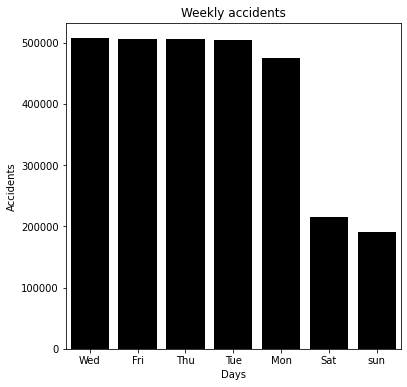

In [125]:
plt.figure(figsize=(6, 6))
sb.barplot(x=[week_days[x] for x in daily_counts.index], y=list(daily_counts), color="Black")
plt.xlabel("Days")
plt.ylabel("Accidents")
plt.title("Weekly accidents")
plt.show()

**On Weekends number of accidents drastically falls compared to Weekdays**

In [132]:
Hour_wala = []

In [44]:
state = data_frame["State"].value_counts() * 100 / len(data_frame)
state

CA    25.140765
FL     9.058663
TX     7.797400
NY     4.341002
NC     4.224750
SC     4.144416
OR     3.383736
PA     3.087618
VA     3.087101
MN     2.742439
IL     2.670671
GA     2.392340
MI     2.307602
AZ     2.122989
TN     1.909269
MD     1.815001
NJ     1.727580
LA     1.723761
WA     1.701467
OH     1.645766
UT     1.613460
CO     1.282594
OK     1.207764
AL     1.145320
MO     0.986510
MA     0.864271
IN     0.859868
CT     0.827562
KY     0.526249
WI     0.504677
NE     0.470583
IA     0.326566
RI     0.286038
NV     0.268767
KS     0.256106
NH     0.215027
MS     0.186437
DC     0.178937
AR     0.162595
DE     0.159120
ID     0.143294
NM     0.136688
WV     0.117697
MT     0.114670
ME     0.077960
VT     0.019094
ND     0.015929
WY     0.014415
SD     0.007466
Name: State, dtype: float64

## Questions and answers




1. Top 5 States with highest accidents?



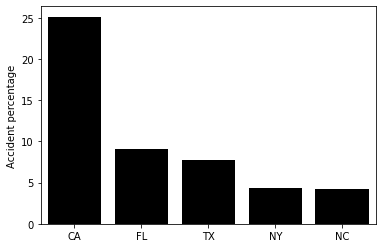

CA    25.140765
FL     9.058663
TX     7.797400
NY     4.341002
NC     4.224750
Name: State, dtype: float64

In [45]:
sb.barplot(x=state[:5].index, y=state[:5], color="black")
plt.ylabel("Accident percentage")
plt.show()

state[:5]

# Summary and Conclusion

## insights


*  There is exponantial increase in yearly accidents.


